<a href="https://colab.research.google.com/github/manuelrossi99/project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sn
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score




#Primi tentativi di merge

The right merging.cleaning and loading off all datasets are on the main file in the gihub


In [ ]:
covid_doses_municipalities = pd.read_csv("COVID19_vaccination_municipalities_doses_timeline.csv", sep = ";")
covid_doses_municipalities_df = pd.DataFrame(covid_doses_municipalities)
mask_last_dates = covid_doses_municipalities_df["date"] == "2022-02-01"
covid_doses_municipalities_df = covid_doses_municipalities_df[mask_last_dates]
covid_doses_municipalities_df.info()
covid_doses_municipalities_df= covid_doses_municipalities_df.drop("date", axis = 1 )
covid_doses_municipalities_df = covid_doses_municipalities_df.reset_index()
covid_doses_municipalities_df = covid_doses_municipalities_df.drop("index", axis =1)

In [ ]:
salaries = pd.read_csv("salaries.csv", sep = ";")
salaries_df = pd.DataFrame(salaries)
salaries_df.info()

In [ ]:
data_df = pd.merge(covid_doses_municipalities_df, salaries_df, on="municipality_id")
data_df.info()

In [ ]:
pop_0_14 = pd.read_csv("pop_0_14.csv", sep = ";")
pop_15_29 = pd.read_csv("pop_15_29.csv", sep = ";")
pop_30_44 = pd.read_csv("pop_30_44.csv", sep = ";")
pop_45_59 = pd.read_csv("pop_45_59.csv", sep = ";")
pop_60_74 = pd.read_csv("pop_60_74.csv", sep = ";")
pop_75_99 = pd.read_csv("pop_75_99.csv", sep = ";")

pop_0_14_df = pd.DataFrame(pop_0_14)
pop_15_29_df = pd.DataFrame(pop_15_29)
pop_30_44_df = pd.DataFrame(pop_30_44)
pop_45_59_df = pd.DataFrame(pop_45_59)
pop_60_74_df = pd.DataFrame(pop_60_74)
pop_75_99_df = pd.DataFrame(pop_75_99)

data_df = pd.merge(data_df, pop_0_14_df, on="municipality_id")
data_df = pd.merge(data_df, pop_15_29_df, on="municipality_id")
data_df = pd.merge(data_df, pop_30_44_df, on="municipality_id")
data_df = pd.merge(data_df, pop_45_59_df, on="municipality_id")
data_df = pd.merge(data_df, pop_60_74_df, on="municipality_id")
data_df = pd.merge(data_df, pop_75_99_df, on="municipality_id")

data_df.info()



In [ ]:
data_df = data_df.drop("municipality_name_x", axis =1 )
data_df = data_df.drop("municipality_name_y", axis =1 )
data_df.info()

In [ ]:
pop_ahs = pd.read_csv("pop_ahs.csv", sep = ";")
pop_ahs_df = pd.DataFrame(pop_ahs)
pop_ahs.info()
data_df = pd.merge(data_df, pop_ahs, on="municipality_id")
data_df.info()
pop_bms_bhs = pd.read.csv("pop_bms_bhs.csv", sep = ";")

In [ ]:
pop_bms_bhs = pd.read_csv("pop_bms_bhs.csv", sep = ";")

In [ ]:
pop_bms_bhs_df = pd.DataFrame(pop_bms_bhs)
pop_bms_bhs_df = pop_bms_bhs_df.drop("municipality_name", axis =1 )
pop_bms_bhs_df.info()

In [ ]:

path = "data_progetto"
file_path = glob.glob(path + "/*.csv")

list_of_df_files = map(lambda file_path: pd.read_csv(file_path, sep = ";", encoding = 'utf-8'), file_path)
list_of_df_files = list(list_of_df_files)

'''
def transform_to_df(a_list_of_tabels):
  a = []
  for i in a_list_of_tabels:
    a.append(pd.DataFrame(i))
  return a 


list_of_df_files = transform_to_df(list_of_df_files)
'''

'''
for i in list_of_df_files:
  i.columns= i.columns.str.replace('[ï»¿]', '')
'''

def merge_df(dataframes, column_names):
    result = dataframes[0]
    for i in range(len(dataframes)):
        result = pd.merge(result, dataframes[i], on=column_names)
    return result

columns = ("municipality_id",	"municipality_name")
data_df = merge_df(list_of_df_files, columns)


In [ ]:

covid_doses_municipalities = pd.read_csv("COVID19_vaccination_municipalities_doses_timeline.csv", sep = ";")
covid_doses_municipalities_df = pd.DataFrame(covid_doses_municipalities)
mask_last_dates = covid_doses_municipalities_df["date"] == "2022-02-01"
covid_doses_municipalities_df = covid_doses_municipalities_df[mask_last_dates]
covid_doses_municipalities_df= covid_doses_municipalities_df.drop("date", axis = 1 )
covid_doses_municipalities_df = covid_doses_municipalities_df.reset_index()
covid_doses_municipalities_df = covid_doses_municipalities_df.drop("index", axis =1)
covid_doses_municipalities_df.info()

In [ ]:
new_list_to_merge = (data_df, covid_doses_municipalities_df)
data_df = merge_df(new_list_to_merge, "municipality_id")

In [ ]:
antivax_docs = pd.read_csv("antivax_docs.csv", sep = ";")
antivax_docs_df = pd.DataFrame(antivax_docs)
antivax_docs_df= antivax_docs_df.groupby("municipality_id", group_keys=False).sum().reset_index()

In [ ]:
data_df = data_df.merge(antivax_docs_df,how='left', left_on='municipality_id', right_on='municipality_id')
data_df = data_df.fillna(0)

In [ ]:
urban_rural = pd.read_csv("urban_rural.csv", sep = ";")
urban_rural_df = pd.DataFrame(urban_rural)
urban_rural_df = urban_rural_df.drop("municipality_name", axis=1)

In [ ]:
data_df = data_df.merge(urban_rural_df,how='left', left_on='municipality_id', right_on='municipality_id')
data_df = data_df.fillna(1) #since missing values are from vienna wich is an urban city

In [ ]:
political_parties = pd.read_csv("nrw_2019_r.csv", sep =";", encoding = 'utf-8')
political_parties_df = pd.DataFrame(political_parties)
political_parties_df.info()
political_parties_df = political_parties_df.drop(["Gebietsname", "eligible_voters", "retrieved", "invalid", "valid"], axis= 1)
political_parties_df.info()

In [ ]:
new_list_to_merge = (data_df, political_parties_df)
data_df = merge_df(new_list_to_merge, "municipality_id")

#From here on excutable


comments and clean coding are on the main.py file 


##Variable Creation 

In [ ]:
data_df = pd.read_csv("data_df_clean")


In [ ]:
data_df.info()

In [ ]:
mask_vaccine_skeptice = data_df["vaccine_skeptic"] > 0
mask_not_vaccine_skeptice = data_df["vaccine_skeptic"] == 0
data_df_vaccine_skeptic = data_df[mask_vaccine_skeptice]
data_df_not_vaccine_skeptic = data_df[mask_not_vaccine_skeptice]

In [ ]:
mean_vaccine_dose1_vs_r = data_df_vaccine_skeptic_and_rural["dose_1_sh"].mean()
mean_vaccine_dose2_vs_r = data_df_vaccine_skeptic_and_rural["dose_2_sh"].mean()
mean_vaccine_dose3_vs_r = data_df_vaccine_skeptic_and_rural["dose_3_sh"].mean()

means_vs_r = [mean_vaccine_dose1_vs_r,
              mean_vaccine_dose2_vs_r, mean_vaccine_dose3_vs_r]


In [ ]:
mask_vaccine_skeptice_and_rural = (data_df["vaccine_skeptic"] > 1) & (
    data_df["type_urban_rural"] > 1)
data_df_vaccine_skeptic_and_rural = data_df[mask_vaccine_skeptice_and_rural]

In [ ]:
data_df["sh_vaccine_skeptic"] = data_df["vaccine_skeptic"] / \
    data_df["municipality_population"]

In [ ]:
#vs standing for vaccine skeptic
mean_vaccine_dose1_vs = data_df_vaccine_skeptic["dose_1_sh"].mean()
mean_vaccine_dose2_vs = data_df_vaccine_skeptic["dose_2_sh"].mean()
mean_vaccine_dose3_vs = data_df_vaccine_skeptic["dose_3_sh"].mean()

mean_vaccine_dose1_nvs = data_df_not_vaccine_skeptic["dose_1_sh"].mean()
mean_vaccine_dose2_nvs = data_df_not_vaccine_skeptic["dose_2_sh"].mean()
mean_vaccine_dose3_nvs = data_df_not_vaccine_skeptic["dose_3_sh"].mean()

means_vs = [mean_vaccine_dose1_vs,
            mean_vaccine_dose2_vs, mean_vaccine_dose3_vs]
means_nvs = [mean_vaccine_dose1_nvs,
             mean_vaccine_dose2_nvs, mean_vaccine_dose3_nvs]


In [ ]:
mean_sh_pop_fpoe_vs = data_df_vaccine_skeptic["FPOE_per"].mean()
mean_sh_pop_fpoe_not_vs = data_df_not_vaccine_skeptic["FPOE_per"].mean()

In [ ]:
mean_pop_uni = data_df["pop_uni"].mean()
mean_sh_pop_uni_ = data_df["sh_pop_uni"].mean()

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018 entries, 0 to 2017
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2018 non-null   int64  
 1   municipality_id          2018 non-null   int64  
 2   municipality_name        2018 non-null   object 
 3   pensions                 2018 non-null   float64
 4   sh_pop_0_14              2018 non-null   float64
 5   pop_0_14                 2018 non-null   int64  
 6   sh_pop_15_29             2018 non-null   float64
 7   pop_15_29                2018 non-null   int64  
 8   sh_pop_30_44             2018 non-null   float64
 9   pop_30_44                2018 non-null   int64  
 10  sh_pop_45_59             2018 non-null   float64
 11  pop_45_59                2018 non-null   int64  
 12  sh_pop_60_74             2018 non-null   float64
 13  pop_60_74                2018 non-null   int64  
 14  sh_pop_75_99            

In [ ]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2018.0,1008.500000,582.690741,0.000000,504.250000,1008.500000,1512.750000,2017.000000
municipality_id,2018.0,44382.976710,19905.090748,10101.000000,31227.250000,41103.500000,61728.750000,92301.000000
pensions,2018.0,24.850820,3.254590,10.153000,22.572000,24.631000,26.712250,41.355000
sh_pop_0_14,2018.0,14.582820,2.200937,5.880000,13.172500,14.650000,16.040000,22.880000
pop_0_14,2018.0,615.650644,2071.283974,3.000000,163.000000,270.000000,490.000000,38456.000000
sh_pop_15_29,2018.0,15.678647,2.072853,8.590000,14.310000,15.640000,17.000000,25.250000
pop_15_29,2018.0,738.087711,2861.697061,6.000000,175.000000,285.500000,509.750000,64834.000000
sh_pop_30_44,2018.0,18.864618,2.072995,10.310000,17.522500,18.905000,20.190000,27.080000
pop_30_44,2018.0,863.316155,3176.627061,5.000000,211.000000,349.000000,622.000000,65429.000000
sh_pop_45_59,2018.0,23.457592,1.827080,15.650000,22.310000,23.370000,24.510000,37.370000


##Plots


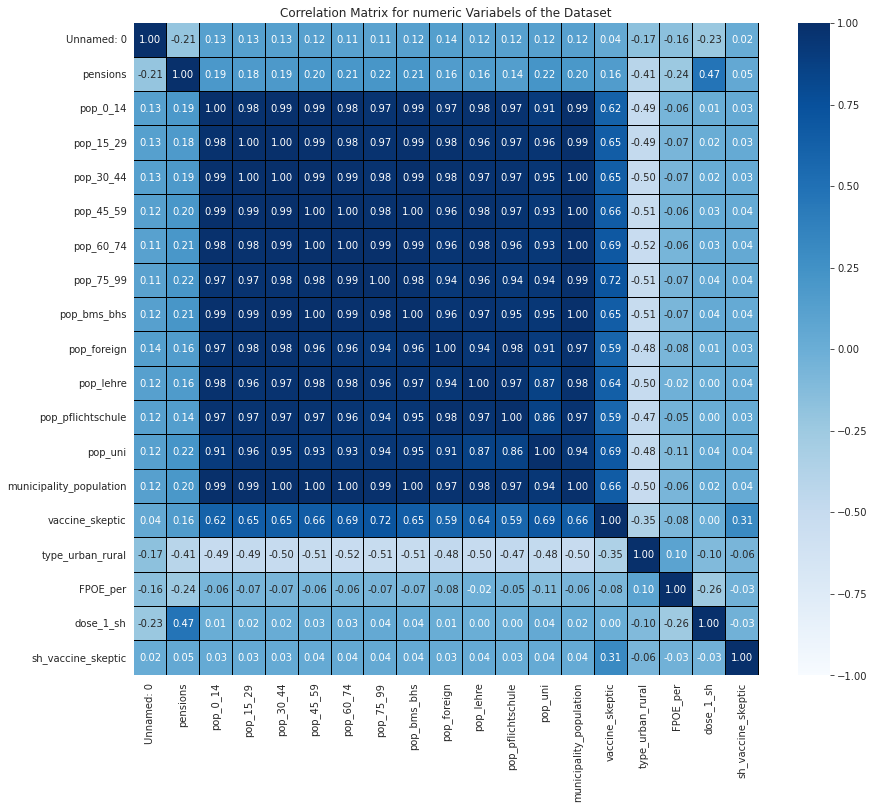

In [ ]:
fig = plt.figure(figsize=(14, 12))
to_drop = ["municipality_id", "municipality_name", "sh_pop_0_14", "sh_pop_15_29", "sh_pop_30_44",
               "sh_pop_45_59", "sh_pop_60_74", "sh_pop_75_99", "sh_pop_bms_bhs", "sh_pop_foreign",
               "sh_pop_lehre", "sh_pop_pflichtschule", "sh_pop_uni", "salaries", "dose_1", "dose_2", "dose_3", "FPOE", "dose_2_sh", "dose_3_sh"]
data_df_copy_corr = data_df.copy()
data_df_copy_corr = data_df_copy_corr.drop(to_drop, axis=1)
corr_matrix = data_df_copy_corr.corr()
sn.heatmap(corr_matrix, cmap="Blues", annot=True, vmax=1,
               vmin=-1, linewidths=0.01, linecolor="black", fmt=".2f").set_title('Correlation Matrix for numeric Variabels of the Dataset')
plt.show()

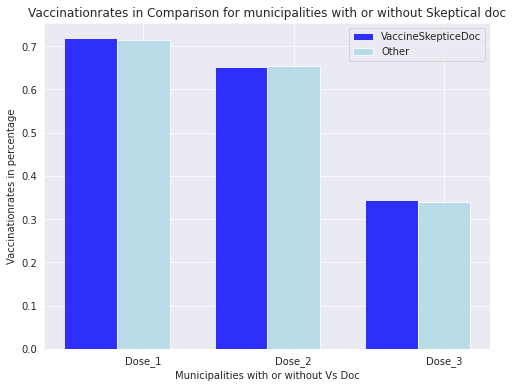

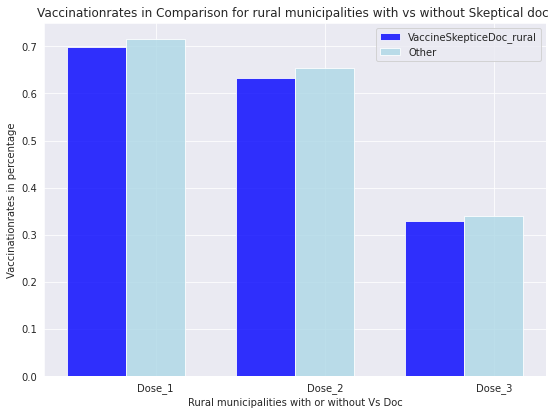

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
index = np.arange(3)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_vs, bar_width,
                         alpha=opacity,
                         color='b',
                         label='VaccineSkepticeDoc')

rects2 = plt.bar(index + bar_width, means_nvs, bar_width,
                         alpha=opacity,
                         color='lightblue',
                         label='Other')

plt.xlabel('Municipalities with or without Vs Doc')
plt.ylabel('Vaccinationrates in percentage')
plt.title('Vaccinationrates in Comparison for municipalities with or without Skeptical doc')
plt.xticks(index + bar_width, ('Dose_1', 'Dose_2', 'Dose_3'))
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(9, 6.5))
index = np.arange(3)
bar_width = 0.35
opacity = 0.8
rects1 = plt.bar(index, means_vs_r, bar_width,
                         alpha=opacity,
                         color='b',
                         label='VaccineSkepticeDoc_rural')

rects2 = plt.bar(index + bar_width, means_nvs, bar_width,
                         alpha=opacity,
                         color='lightblue',
                         label='Other')

plt.xlabel('Rural municipalities with or without Vs Doc')
plt.ylabel('Vaccinationrates in percentage')
plt.title('Vaccinationrates in Comparison for rural municipalities with vs without Skeptical doc ')
plt.xticks(index + bar_width, ('Dose_1', 'Dose_2', 'Dose_3'))
plt.legend()
plt.show()
        



Text(0.5, 1.0, 'Population Distribution for Austrian Municipalities')

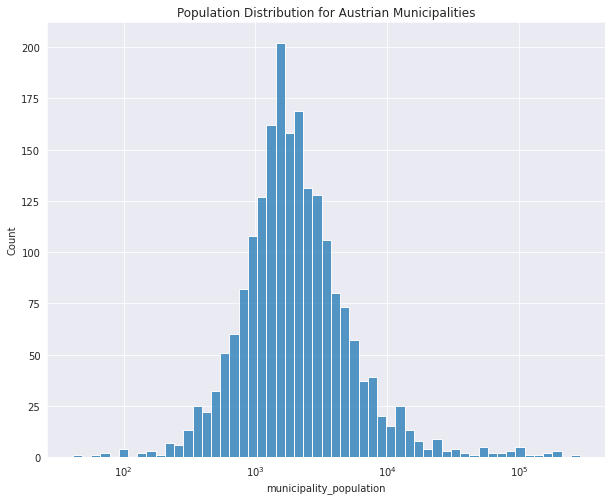

In [ ]:
fig = plt.figure(figsize=(10, 8))
sn.set_style('darkgrid')
sn.histplot(data_df["municipality_population"], log_scale=True).set_title(
        'Population Distribution for Austrian Municipalities')


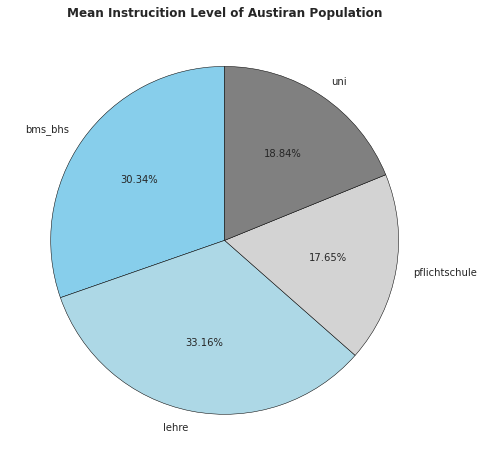

In [ ]:
fig = plt.figure(figsize=(10, 8))
mean_pop_lehre = data_df["pop_lehre"].mean()
mean_pop_pflichtschule = data_df["pop_pflichtschule"].mean() 
mean_pop_bms_bhs = data_df["pop_bms_bhs"].mean()
y = [mean_pop_bms_bhs, mean_pop_lehre,
         mean_pop_pflichtschule, mean_pop_uni]
mylabels = ["bms_bhs", "lehre", "pflichtschule", "uni"]
colors = ["Skyblue", "LightBlue", "LightGrey", "Grey"]
plt.title('Mean Instrucition Level of Austiran Population',
              fontweight="bold")
plt.pie(y, labels=mylabels, startangle=90, colors=colors,
            wedgeprops={'linewidth': 0.5, 'edgecolor': "black"}, autopct='%.2f%%')
plt.show()

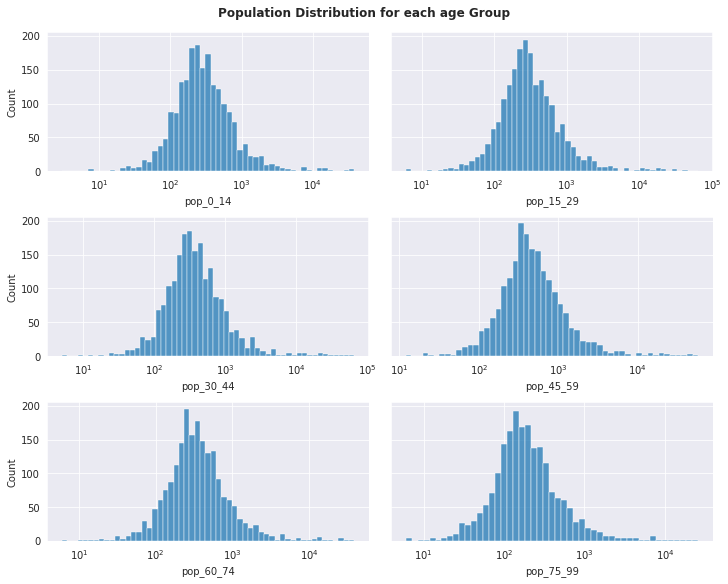

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(
        10, 8), sharey=True, constrained_layout=True)
fig.suptitle('Population Distribution for each age Group',
                 fontweight="bold")
sn.set_style('darkgrid')
sn.histplot(data_df["pop_0_14"], log_scale=True, ax=axes[0, 0])
sn.histplot(data_df["pop_15_29"], log_scale=True, ax=axes[0, 1])
sn.histplot(data_df["pop_30_44"], log_scale=True, ax=axes[1, 0])
sn.histplot(data_df["pop_45_59"], log_scale=True, ax=axes[1, 1])
sn.histplot(data_df["pop_60_74"], log_scale=True, ax=axes[2, 0])
sn.histplot(data_df["pop_75_99"], log_scale=True, ax=axes[2, 1])
plt.show()

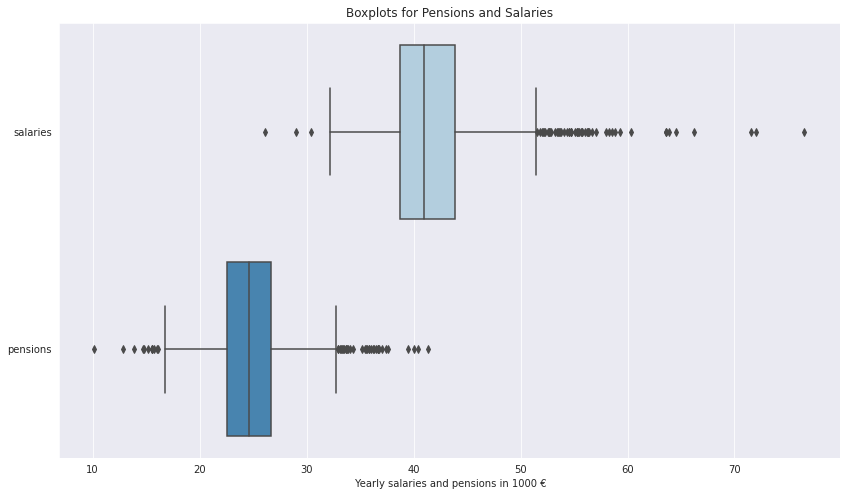

In [ ]:
fig = plt.figure(figsize=(14, 8))
ax = sn.boxplot(
        data=data_df[["salaries", "pensions"]], orient="h", palette="Blues")
ax.set(xlabel=' Yearly salaries and pensions in 1000 €',
           title="Boxplots for Pensions and Salaries")
plt.show()

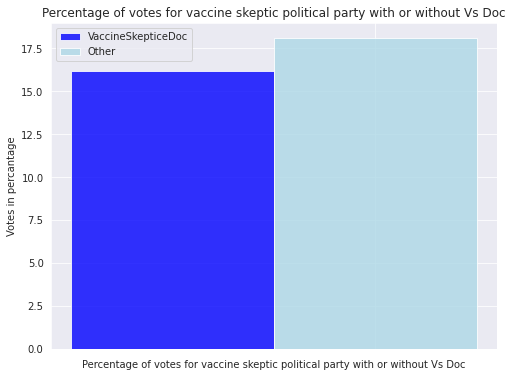

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
index = np.arange(1)
bar_width = 0.1
opacity = 0.8

rects1 = plt.bar(index, mean_sh_pop_fpoe_vs, bar_width,
                         alpha=opacity,
                         color='b',
                         label='VaccineSkepticeDoc')

rects2 = plt.bar(index + bar_width, mean_sh_pop_fpoe_not_vs, bar_width,
                         alpha=opacity,
                         color='lightblue',
                         label='Other')

plt.xlabel('Percentage of votes for vaccine skeptic political party with or without Vs Doc')
plt.ylabel('Votes in percantage')
plt.xticks(index + bar_width, ())
plt.title('Percentage of votes for vaccine skeptic political party with or without Vs Doc')
plt.legend()
plt.show()

## Models

In [ ]:
vaccination_rate = data_df["dose_1_sh"]
pensions = data_df["pensions"]
sh_vaccine_skeptic = data_df["sh_vaccine_skeptic"]
skeptic_politcal_party = data_df["FPOE_per"]
sh_0_14 = data_df["sh_pop_0_14"]
sh_15_29 = data_df["sh_pop_15_29"]
sh_30_44 = data_df["sh_pop_30_44"]
sh_45_59 = data_df["sh_pop_45_59"]
sh_60_74 = data_df["sh_pop_60_74"]
sh_75_99 = data_df["sh_pop_75_99"]
sh_forgein = data_df["sh_pop_foreign"]
sh_bms_bhs = data_df["sh_pop_bms_bhs"]
sh_lehre = data_df["sh_pop_lehre"]
sh_pflichtschule = data_df["sh_pop_pflichtschule"]
sh_uni = data_df["sh_pop_uni"]
salries = data_df["salaries"]
urban_rural = data_df["type_urban_rural"]


In [ ]:
result = smf.ols(
    formula='''vaccination_rate ~ sh_vaccine_skeptic  + pensions
     + skeptic_politcal_party + sh_0_14 + sh_15_29 + \
         sh_30_44 + sh_45_59 + sh_60_74 + sh_75_99
     + sh_forgein + sh_bms_bhs + sh_lehre + sh_pflichtschule + sh_uni + salaries + urban_rural''',
    data=data_df).fit()


In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       vaccination_rate   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     142.9
Date:                Wed, 01 Feb 2023   Prob (F-statistic):          2.01e-316
Time:                        14:18:52   Log-Likelihood:                 3488.1
No. Observations:                2018   AIC:                            -6942.
Df Residuals:                    2001   BIC:                            -6847.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2.4554     13.676      0.180      0.858     -24.365      29.276
sh_vaccine_skeptic       -32.8267     11.591     -2.832      0.005     -55.558     -10.095
pensions                   0.0067      0.001     13.017      0.000       0.006       0.008
skeptic_politcal_party    -0.0025      0.000    -11.447      0.000      -0.003      -0.002
sh_0_14                   -0.0161      0.137     -0.118      0.906      -0.284       0.252
sh_15_29                  -0.0105      0.137     -0.077      0.939      -0.278       0.257
sh_30_44                  -0.0023      0.137     -0.017      0.987      -0.270       0.266
sh_45_59                  -0.0034      0.137     -0.025      0.980      -0.271       0.264
sh_60_74                  -0.0047      0.137     -0.035      0.972      -0.273       0.263
sh_75_99                  -0.0060      0.137     -0.044      0.965      -0.274       0.262
sh_forgein                -0.0019      0.000     -8.924      0.000      -0.002      -0.001
sh_bms_bhs                -0.0105      0.004     -2.902      0.004      -0.018      -0.003
sh_lehre                  -0.0139      0.004     -3.865      0.000      -0.021      -0.007
sh_pflichtschule          -0.0101      0.004     -2.807      0.005      -0.017      -0.003
sh_uni                    -0.0143      0.004     -3.989      0.000      -0.021      -0.007
salaries                   0.0014      0.000      3.027      0.003       0.000       0.002
urban_rural               -0.0021      0.003     -0.696      0.486      -0.008       0.004
==============================================================================
Omnibus:                      134.846   Durbin-Watson:                   1.370
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.071
Skew:                          -0.485   Prob(JB):                     2.72e-53
Kurtosis:                       4.392   Cond. No.                     1.24e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
y = vaccination_rate

model = LinearRegression()

variable_choices = ["sh_vaccine_skeptic", "pensions", "FPOE_per", "sh_pop_0_14", "sh_pop_15_29", "sh_pop_30_44",
                    "sh_pop_45_59", "sh_pop_60_74", "sh_pop_75_99", "sh_pop_foreign", "sh_pop_bms_bhs", "sh_pop_lehre",
                    "sh_pop_pflichtschule", "sh_pop_uni","salaries", "type_urban_rural"]

test_size = 0.2 #selectable
x = data_df[variable_choices]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=2)
model.fit(x_train[variable_choices], y_train)
x_test = x_test[variable_choices].to_numpy().reshape(-1, len(variable_choices))
y_pred = model.predict(x_test)
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

R-squared: 0.5414202981472125


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
